# CODE:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras as tk

In [3]:
(x_train, y_train), (x_test, y_test) = tk.datasets.fashion_mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

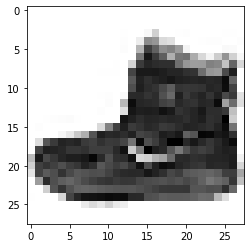

In [8]:
plt.imshow(x_train[0], cmap='Greys')

In [9]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle boot"]

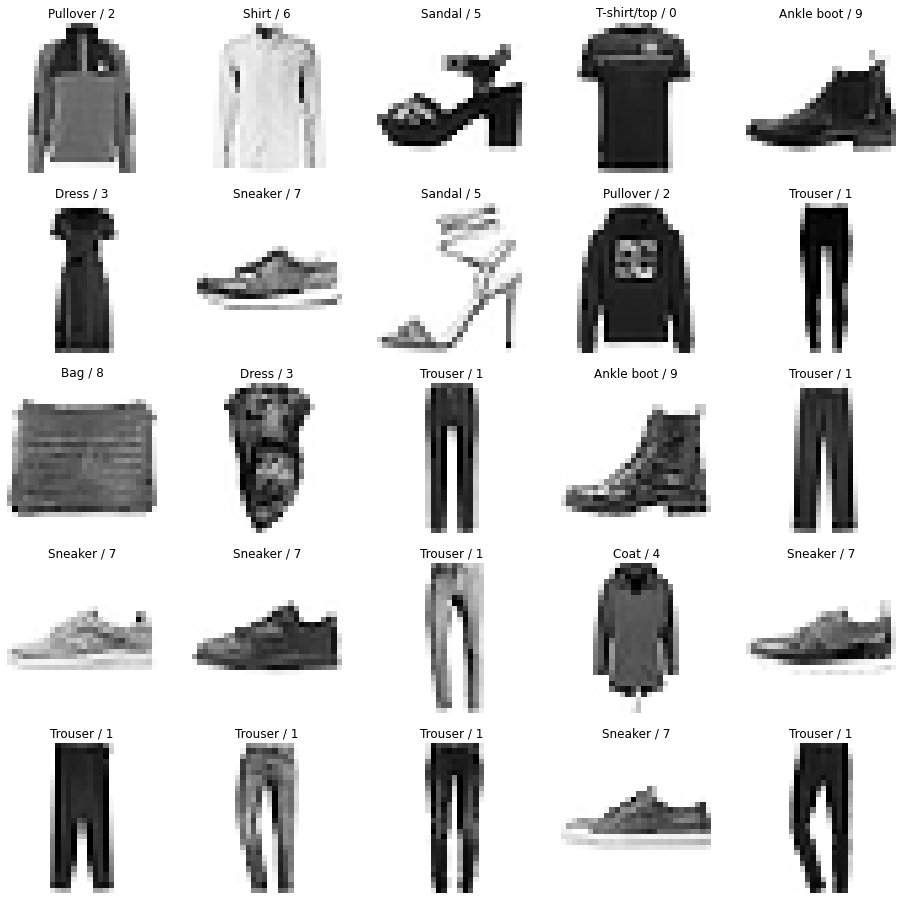

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(x_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [11]:
x_train.ndim

3

In [12]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [13]:
x_train.ndim

4

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

In [17]:
x_train.shape

(48000, 28, 28, 1)

In [47]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train, epochs=30, batch_size=512, verbose=1, validation_data=(x_val, y_val))

Epoch 1/30
94/94 [==============================] - 21s 215ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.3154 - val_accuracy: 0.9125
Epoch 2/30
94/94 [==============================] - 18s 195ms/step - loss: 0.0463 - accuracy: 0.9869 - val_loss: 0.3255 - val_accuracy: 0.9123
Epoch 3/30
94/94 [==============================] - 21s 227ms/step - loss: 0.0435 - accuracy: 0.9877 - val_loss: 0.3279 - val_accuracy: 0.9124
Epoch 4/30
94/94 [==============================] - 31s 336ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.3444 - val_accuracy: 0.9101
Epoch 5/30
94/94 [==============================] - 34s 365ms/step - loss: 0.0384 - accuracy: 0.9896 - val_loss: 0.3359 - val_accuracy: 0.9125
Epoch 6/30
94/94 [==============================] - 35s 376ms/step - loss: 0.0330 - accuracy: 0.9917 - val_loss: 0.3512 - val_accuracy: 0.9133
Epoch 7/30
94/94 [==============================] - 26s 274ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.3516 - val_accuracy: 0.9136

In [51]:
model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 277ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [52]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 70ms/step


9

In [53]:
y_test[0]

9

In [54]:
y_pred = model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 2s 7ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4978 - accuracy: 0.9129


[0.4978380799293518, 0.9128999710083008]

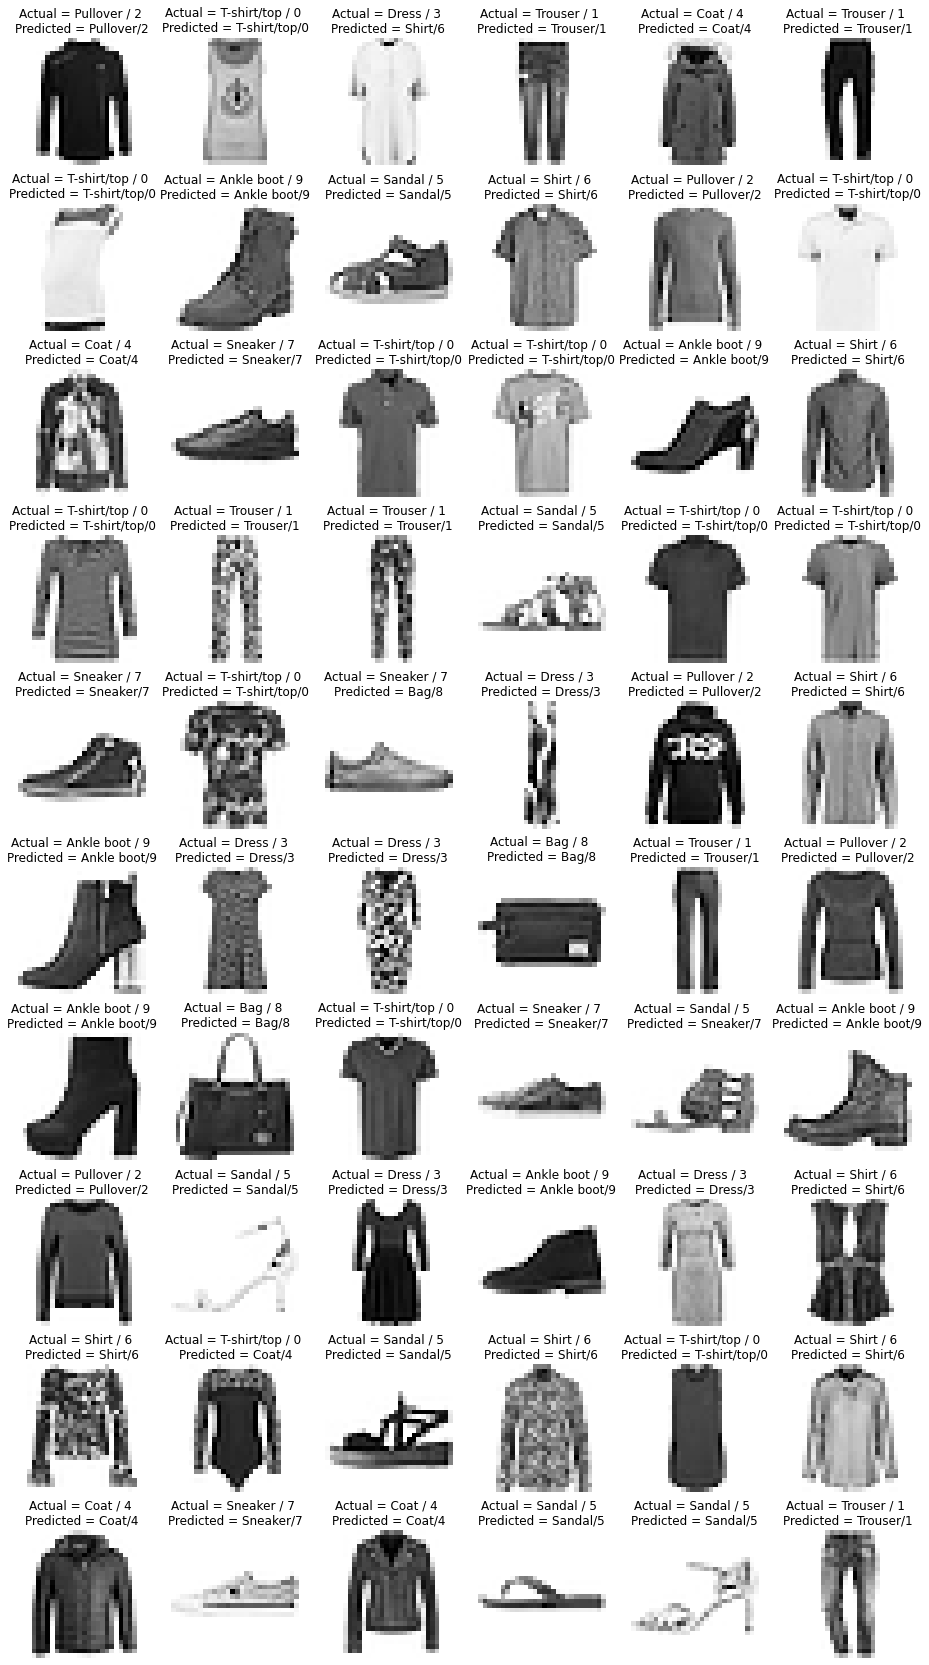

In [37]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
    plt.subplot(10,6,j); j+=1
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    
    plt.title('Actual = {} / {} \nPredicted = {}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

In [38]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [42]:
model.save('fashion_classification_cnn_model_by_samya.h5')